# Multi-layer perceptron

Ici nous allons utiliser tensorflow pour creer un reseau de perceptron avec une couche cachee, la majorite du code et des explications du debut sont identiques au premier tutoriel.

In [1]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import random

Dans le code qui suit nous allons charger les donnees MNIST, le code se chargera de telecharger les donnees pour vous, laissez lui un peu de temps.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


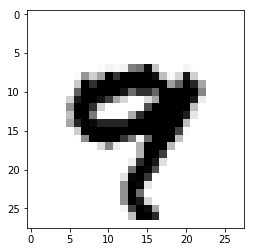

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
s = ax.imshow(random.choice(mnist.test.images).reshape((28,28)), cmap = matplotlib.cm.binary)
plt.show()

Ci-dessus un exemple aleatoire de chiffre MNIST. Le code a peu d'interet, ne vous attardez pas dessus.

In [4]:
x = tf.placeholder(tf.float32, [None, 28*28])
classes = tf.placeholder(tf.float32, [None, 10])

Nos images font 28x28 pixels, nous avons donc besoin d'un moyen de donner ces images a notre modele, comme nous ne les envoyons pas au modele pendant que nous le construisons nous utilisons un **placeholder**.

Nous utilisons egalement un **placeholder** pour les classes. Par exemple un chiffre '1' aura pour classe [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] et le chiffre '5' aura pour classe [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], c'est pourquoi nous avons 10 comme dimension. 

In [5]:
def generate_weights(x, y):
    return tf.Variable(tf.truncated_normal([x, y], stddev=1./x))

def generate_bias(x):
    return tf.Variable(tf.truncated_normal([x], stddev=1./x))

Deux fonctions permettant d'initialiser les poids et les bias aleatoirement, pour eviter d'avoir un gradient a 0 ce qui empecherait l'apprentissage.

In [6]:
W_hidden = generate_weights(28*28, 128)
b_hidden = generate_bias(128)

W = generate_weights(128, 10)
b = generate_bias(10)

Voila le modele, nous utilisons 10 neurones, 1 par chiffre possible, chaque neurone prend en entree les sorties de 128 autres neurones qui prennent en entrees tous les pixels nous avons donc besoin d'une matrice 28x28 = 784, 784x128 et d'une matrice 128x10.

La variable b est notre bias, nous reviendrons sur son utilite dans un prochain chapitre.

In [7]:
y_hidden = tf.nn.relu(tf.matmul(x, W_hidden) + b_hidden)

y = tf.matmul(y_hidden, W) + b

Nous multiplions x qui etait notre placeholder de dimension Nx784 avec notre matrice W_hidden de dimension 784x128 ce qui donne une matrice Nx128 a laquelle nous ajoutons notre bias. Nous appliquons ensuite une fonction non lineaire **relu** sur le resultat, vous pouvez essayer d'utiliser **softmax** afin de comparer les resultats. Nous utilisons le resultat avec notre matrice 128x10. 

In [8]:
cross_entropy = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=classes, logits=y))

Ici nous definissons notre fonction de cout, elle applique egalement la fonction softmax sur **y**.

In [9]:
entrainement = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Nous utilisons la methode de descente de gradient pour minimiser notre fonction de cout. 

![descente de gradient](http://images.slideplayer.fr/4/1570133/slides/slide_97.jpg)


In [10]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

Notre modele etant fini nous pouvons lancer une session tensorflow et initialiser toutes nos variables.

In [11]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(entrainement, feed_dict={x: batch_xs, classes: batch_ys})

In [12]:
# Test trained model
prediction = tf.equal(tf.argmax(y, 1), tf.argmax(classes, 1))
performance = tf.reduce_mean(tf.cast(prediction, tf.float32))
taux_reussite = sess.run(performance, feed_dict={x: mnist.test.images,
                                  classes: mnist.test.labels})

print("Taux de reussite: " + str(taux_reussite))

Taux de reussite: 0.9619


Voila qui conclu le chapitre sur les reseaux avec plusieurs couches!
Vous pouvez voir que nous obtenons un resultat d'environ 96% compare au 91% du modele simple.

**Exercice 1:** Utiliser la fonction prediction sur une image aleatoire random.choice(mnist.test.images) et l'afficher afin de verifier si vous etes d'accord avec la prediction du modele.

**Exercice 2:** Changer le nombre de neurones dans la couche cache (128 ici) pour voir l'effet sur le taux de reussite.

**Exercice 3:** Ajouter une couche supplementaire au reseau et voir l'effet sur le taux de reussite.